## Situation introduction:：  
The company recruited a new batch of interns, to do dozens of internship contracts. I spent most of the day finishing the contract and showed it to my boss, who was not satisfied with it: "Our company's internship contract template has been updated, you didn't just know? Go back and redo it." I compared the latest document template and shed two broad tears.(The red box in this document indicates the parts to be processed in the old document, that is, the contents in the red box need to be added to the old document.)   
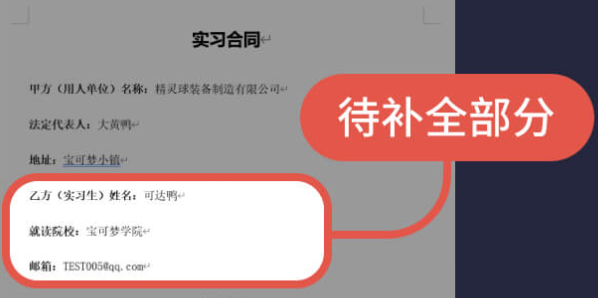
### Requirement：  
1、According to the requirements of the boss, the internship contract needs to add three lines of intern information.  
2、It is necessary to complete the missing content in the existing contract according to the template.  
3、Set the text style according to the contract template.

In [1]:
# 1 - Process Word documents and add data corresponding to Excel tables to Word documents

import os, docx, openpyxl
from docx.shared import Pt

# Part ONE: 
# The internship contract with complete content is generated according to the contract template.
# And the filling template is generated
wd_path = r'C:\Users\86183\Desktop\python\扇贝编程\自动化办公实战\Word写入数据文档\实习合同\实习合同 - 可达鸭.docx'
wd = docx.Document(wd_path)

# Bold text to be inserted
insert_bold = ['乙方（实习生）姓名：', '就读院校：', '邮箱：']

# Regular text that needs to be inserted (for future substitutions)
insert_normal = ['#姓名#', '#就读院校#', '#邮箱#']

# Insert three new paragraphs before paragraph 5
para = wd.paragraphs[4]

# The following code looks at the line spacing before the insertion position and the spacing before and after the paragraph

#para_before = wd.paragraphs[3]
#normal_format = para_bofore.paragraph_format

#print(normal_format.line_spacing)
#print(normal_format.space_before.pt), 
#print(normal_format.space_after.pt)

for i in range(3):
  new_para = para.insert_paragraph_before('')
  
  # Set paragraph style to 1.5 line spacing and 5.0pt spacing before and after paragraphs
  # You can see the spacing between paragraphs by looping through the code commented above
  new_para.paragraph_format.line_spacing = 1.5  
  new_para.paragraph_format.space_before = Pt(5.0)
  new_para.paragraph_format.space_after = Pt(5.0)

  # Add elements from the lists insert_bold and insert_normal to the new paragraph
  new_para.add_run(insert_bold[i]).bold = True

  # You may also need to add italics or underscores
  #new_para.runs[0].italic = True  
  #new_para.runs[0].underline = True
    
  new_para.add_run(insert_normal[i])

# Part TWO: Replace information with the replace_info() function

# Read the Excel worksheet used to replace the information
wb = openpyxl.load_workbook(r'C:\Users\86183\Desktop\python\扇贝编程\自动化办公实战\Word写入数据文档\实习生信息替换模板.xlsx')
ws = wb['汇总']

# Define the replace_info() function
def replace_info(wd, old_info, new_info):
  # Walk through each paragraph in your Word document
  for para in wd.paragraphs:
    # Walk through each style block in your Word document
    for run in para.runs:
      # If the text in the style block contains old_info, replace it with new_info
      run.text = run.text.replace(old_info, new_info)

# Find which line of information corresponds to the current document.
# key_infor is a variable connected to Word and Excel
# For example, word[9, 3] represents 可达鸭, that is, go to the A column of Excel to find the cell named 可达鸭
key_info = wd.paragraphs[9].runs[3].text
# Store all the values for column A into list names
names = [cell.value for cell in ws['A']]
# Find the index position of the key_infor. 
# The Excel row index starts at 1, so the row number is the index value +1
row = names.index(key_info) + 1

# Make a one-to-one match between the replaced information and the replaced result
# ws[1] should mean the first line
old_infos = [cell.value for cell in ws[1]]
new_infos = [cell.value for cell in ws[row]]
replace_list = zip(old_infos, new_infos)

# Call replace_info() function to replace the information
for old_info, new_info in replace_list:
  replace_info(wd, old_info, new_info)

# Save the generated Word document to the current directory
wd.save(r'C:\Users\86183\Desktop\python\扇贝编程\自动化办公实战\Word写入数据文档\实习合同\实习合同完整版 - 可达鸭.docx')

In [3]:
# 2 - Batch process Word documents and insert corresponding Excel data into Word documents
# Perhaps the comments on the previous code block are clearer, and some of the same code is not commented in this code block

# Import the required modules
import os, fnmatch, openpyxl, docx
from docx.shared import Pt

# Read the Excel workbook used to replace information
wb = openpyxl.load_workbook(r'C:\Users\86183\Desktop\python\扇贝编程\自动化办公实战\Word写入数据文档\实习生信息替换模板.xlsx')
ws = wb['Summarizing']

# Define text replacement functions
def replace_info(wordfile, old_info, new_info):
  for paragraph in wordfile.paragraphs:
    for run in paragraph.runs:
      run.text = run.text.replace(old_info, new_info)

# Read all .docx files in the "实习合同" folder
dir_path = r'C:\Users\86183\Desktop\python\扇贝编程\自动化办公实战\Word写入数据文档\实习合同'
all_files = os.listdir(dir_path)
# Filter the .docx files under the folder
all_wordfiles = [file for file in all_files if fnmatch.fnmatch(file, '*.docx')]

# Bold text to be inserted in a Word document
insert_bold = ['乙方（实习生）姓名：', '就读院校：', '邮箱：']
# Regular text that needs to be inserted in Word documents (for future substitutions)
insert_normal = ['#姓名#', '#就读院校#', '#邮箱#']

# Generate full contract
for wordfile in all_wordfiles:
  # Walk through every .docx document in the '实习合同' folder
  # Combine the folder path with the document name to get the complete path of the document
  wd_path = os.path.join(dir_path, wordfile)
  wd = docx.Document(wd_path)

  # Use a loop to insert three new paragraphs before paragraph 5
  para = wd.paragraphs[4]
    
  # The following code looks at the line spacing before the insertion position and the spacing before and after the paragraph

  #para_before = wd.paragraphs[3]
  #normal_format = para_bofore.paragraph_format

  #print(normal_format.line_spacing)
  #print(normal_format.space_before.pt), 
  #print(normal_format.space_after.pt)

  for i in range(3):
    new_para = para.insert_paragraph_before('')
    # Set paragraph style to 1.5 line spacing and 5.0pt spacing before and after paragraphs
    new_para.paragraph_format.line_spacing = 1.5
    new_para.paragraph_format.space_before = Pt(5.0)
    new_para.paragraph_format.space_after = Pt(5.0)

    # Add elements from the lists insert_BOLD and insert_normal to the new paragraph
    new_para.add_run(insert_bold[i]).bold = True
    
    # You may also need to add italics or underscores
    #new_para.runs[0].italic = True  
    #new_para.runs[0].underline = True
    
    new_para.add_run(insert_normal[i])

  # Fill in the intern information in the document
  # Find which line of information corresponds to the current document.
  key_info = wd.paragraphs[9].runs[3].text
  names = [cell.value for cell in ws['A']]
  row = names.index(key_info) + 1

  # Make a one-to-one match between the replaced information and the replaced result
  old_infos = [cell.value for cell in ws[1]]
  new_infos = [cell.value for cell in ws[row]]
  replace_list = zip(old_infos, new_infos)

  # Call replace_info() function to replace the information
  for old_info, new_info in replace_list:
    replace_info(wd, old_info, new_info)
   
  # Save the generated full contract to the current directory
  save_name = f'C:\\Users\\86183\\Desktop\\python\\扇贝编程\\自动化办公实战\\Word写入数据文档\\实习合同\\批量实习合同完整版-{key_info}.docx'
  wd.save(save_name)

## Statement  
Title scene from shanbay programming, the author of the reference code for a brief improvement and add some notes, the author published this document for summary and share, do not use for any commercial purposes, please indicate the source. 
See the original website for details: https://web.shanbay.com/codetime/home/lessons-new/bicec
 
If you want to contact me, you can send an email to: 1575750623@qq.com. I'll get back to you when I see it. Summary is not easy, I hope you enjoy!